In [ ]:
!pip install --upgrade --force-reinstall nba_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.3/285.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from nba_api.stats.endpoints import playergamelogs
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.endpoints import commonplayerinfo
import pandas as pd
from scipy.stats import truncnorm
from IPython.display import display
pd.set_option('display.max_columns', None)

In [ ]:
players_to_avoid = {
    200782: 'P.J. Tucker',
    201145: 'Jeff Green',
    201152: 'Thaddeus Young',
    201567: 'Kevin Love',
    201568: 'Danilo Gallinari',
    201577: 'Robin Lopez',
    201580: 'JaVale McGee',
    201587: 'Nicolas Batum',
    201599: 'DeAndre Jordan',
    201949: 'James Johnson',
    201959: 'Taj Gibson',
    201980: 'Danny Green',
    201988: 'Patty Mills',
    202066: 'Garrett Temple',
    202083: 'Wesley Matthews',
    202330: 'Gordon Hayward',
    202397: 'Ish Smith',
    202684: 'Tristan Thompson',
    202687: 'Bismack Biyombo',
    202692: 'Alec Burks',
    202693: 'Markieff Morris',
    202694: 'Marcus Morris Sr.',
    202709: 'Cory Joseph',
    202711: 'Bojan Bogdanovic',
    202722: 'Davis Bertans',
    203095: 'Evan Fournier',
    203109: 'Jae Crowder',
    203200: 'Justin Holiday',
    203458: 'Alex Len',
    203469: 'Cody Zeller',
    203482: 'Kelly Olynyk',
    203486: 'Mason Plumlee',
    203488: 'Mike Muscala',
    203490: 'Otto Porter Jr.',
    203493: 'Reggie Bullock Jr.',
    203496: 'Robert Covington',
    203914: 'Gary Harris',
    203915: 'Spencer Dinwiddie',
    203925: 'Joe Harris',
    203926: 'Doug McDermott',
    203933: 'T.J. Warren',
    203937: 'Kyle Anderson',
    203939: 'Dwight Powell',
    203957: 'Dante Exum',
    203967: 'Dario Saric',
    203995: 'Vasilije Micic',
    204060: 'Joe Ingles',
    204456: 'T.J. McConnell',
    1626145: 'Tyus Jones',
    1626153: 'Delon Wright',
    1626158: 'Richaun Holmes',
    1626166: 'Cameron Payne',
    1626168: 'Trey Lyles',
    1626172: 'Kevon Looney',
    1626174: 'Christian Wood',
    1626181: 'Norman Powell',
    1626192: 'Pat Connaughton',
    1626196: 'Josh Richardson',
    1626204: 'Larry Nance Jr.',
    1626220: "Royce O'Neale",
    1626224: 'Cedi Osman',
    1626246: 'Boban Marjanovic',
    1627739: 'Kris Dunn',
    1627745: 'Damian Jones',
    1627747: 'Caris LeVert',
    1627777: 'Georges Niang',
    1627780: 'Gary Payton II',
    1627788: 'Furkan Korkmaz',
    1627853: 'Ryan Arcidiacono',
    1627863: 'Danuel House Jr.',
    1627885: 'Shaquille Harrison',
    1628365: 'Markelle Fultz',
    1628371: 'Jonathan Isaac',
    1628372: 'Dennis Smith Jr.',
    1628373: 'Frank Ntilikina',
    1628379: 'Luke Kennard',
    1628380: 'Zach Collins',
    1628381: 'John Collins',
    1628382: 'Justin Jackson',
    1628391: 'D.J. Wilson',
    1628404: 'Josh Hart',
    1628418: 'Thomas Bryant',
    1628420: 'Monte Morris',
    1628424: 'Kobi Simmons',
    1628426: 'Sasha Vezenkov',
    1628436: 'Luke Kornet',
    1628449: 'Chris Boucher',
    1628464: 'Daniel Theis',
    1628467: 'Maxi Kleber',
    1628470: 'Torrey Craig',
    1628962: 'Udoka Azubuike',
    1628966: 'Keita Bates-Diop',
    1628971: 'Bruce Brown',
    1628972: 'Troy Brown Jr.',
    1628975: 'Jevon Carter',
    1628977: 'Hamidou Diallo',
    1628978: 'Donte DiVincenzo',
    1628981: 'Bruno Fernando',
    1628984: "Devonte' Graham",
    1628988: 'Aaron Holiday',
    1628995: 'Kevin Knox II',
    1628998: 'Cody Martin',
    1629001: "De'Anthony Melton",
    1629002: 'Chimezie Metu',
    1629003: 'Shake Milton',
    1629004: 'Svi Mykhailiuk',
    1629006: 'Josh Okogie',
    1629007: 'Jontay Porter',
    1629010: 'Jerome Robinson',
    1629013: 'Landry Shamet',
    1629018: 'Gary Trent Jr.',
    1629020: 'Jarred Vanderbilt',
    1629021: 'Moritz Wagner',
    1629022: 'Lonnie Walker IV',
    1629026: 'Kenrich Williams',
    1629048: 'Goga Bitadze',
    1629052: 'Oshae Brissett',
    1629057: 'Robert Williams III',
    1629111: 'Jock Landale',
    1629117: 'Wenyen Gabriel',
    1629130: 'Duncan Robinson',
    1629139: 'Yuta Watanabe',
    1629162: 'Jordan McLaughlin',
    1629216: 'Gabe Vincent',
    1629232: 'Kaiser Gates',
    1629234: 'Drew Eubanks',
    1629308: 'Juan Toscano-Anderson',
    1629312: 'Haywood Highsmith',
    1629599: 'Amir Coffey',
    1629603: 'Mamadi Diakite',
    1629610: 'DaQuan Jeffries',
    1629618: 'Jalen Pickett',
    1629623: 'Lindell Wigginton',
    1629629: 'Cam Reddish',
    1629631: "De'Andre Hunter",
    1628385: 'Harry Giles III',
    1629634: 'Brandon Clarke',
    1629637: 'Jaxson Hayes',
    1629638: 'Nickeil Alexander-Walker',
    1629640: 'Keldon Johnson',
    1629642: 'Nassir Little',
    1629643: 'Chuma Okeke',
    1629646: 'Charles Bassey',
    1629647: 'Darius Bazley',
    1629650: 'Moses Brown',
    1629652: 'Luguentz Dort',
    1629656: 'Quentin Grimes',
    1629659: 'Talen Horton-Tucker',
    1629660: 'Ty Jerome',
    1629667: 'Jalen McDaniels',
    1629669: 'Jaylen Nowell',
    1629670: 'Jordan Nwora',
    1629674: 'Neemias Queta',
    1629677: 'Luka Samanic',
    1629678: 'Admiral Schofield',
    1629680: 'Matisse Thybulle',
    1629684: 'Grant Williams',
    1629685: 'Dylan Windler',
    1629716: 'Marques Bolden',
    1629717: 'Armoni Brooks',
    1629718: 'Charlie Brown Jr.',
    1629723: 'John Konchar',
    1629726: 'Garrison Mathews',
    1629731: 'Dean Wade',
    1629750: 'Javonte Green',
    1629875: 'Xavier Moon',
    1630165: 'Killian Hayes',
    1630167: 'Obi Toppin',
    1630168: 'Onyeka Okongwu',
    1630171: 'Isaac Okoro',
    1630173: 'Precious Achiuwa',
    1630175: 'Cole Anthony',
    1630177: 'Theo Maledon',
    1630180: 'Saddiq Bey',
    1630181: 'R.J. Hampton',
    1630184: 'Kira Lewis Jr.',
    1630186: "Jahmi'us Ramsey",
    1630188: 'Jalen Smith',
    1630191: 'Isaiah Stewart',
    1630192: 'Zeke Nnaji',
    1630194: 'Paul Reed',
    1630196: 'Filip Petrusev',
    1630197: 'Aleksej Pokusevski',
    1630198: 'Isaiah Joe',
    1630200: 'Tre Jones',
    1630201: 'Malachi Flynn',
    1630202: 'Payton Pritchard',
    1630204: 'Ashton Hagans',
    1630205: 'Lamar Stevens',
    1630207: 'Nate Hinton',
    1630208: 'Nick Richards',
    1630209: 'Omer Yurtseven',
    1630214: 'Xavier Tillman',
    1630215: 'Jared Butler',
    1630219: 'Skylar Mays',
    1630222: 'Mason Jones',
    1630227: 'Daishen Nix',
    1630228: 'Jonathan Kuminga',
    1630230: 'Naji Marshall',
    1630231: 'KJ Martin',
    1630235: 'Trent Forrest',
    1630240: 'Saben Lee',
    1630241: 'Sam Merrill',
    1630243: 'Trevelin Queen',
    1630245: 'Ayo Dosunmu',
    1630249: 'Vit Krejci',
    1630256: "Jae'Sean Tate",
    1630259: 'Jordan Ford',
    1630264: 'Anthony Gill',
    1630284: 'Kevon Harris',
    1630285: 'Zavier Simpson',
    1630288: 'Jeff Dowtin Jr.',
    1630296: 'Braxton Key',
    1630311: 'Pat Spencer',
    1630314: 'Brandon Williams',
    1630322: 'Lindy Waters III',
    1630346: 'Matt Ryan',
    1630526: 'Jeremiah Robinson-Earl',
    1630527: 'Brandon Boston Jr.',
    1630529: 'Herbert Jones',
    1630530: 'Trey Murphy III',
    1630531: 'Jaden Springer',
    1630533: 'Ziaire Williams',
    1630534: 'Ochai Agbaji',
    1630535: 'Greg Brown III',
    1630537: 'Chris Duarte',
    1630538: 'Bones Hyland',
    1630540: 'Miles McBride',
    1630541: 'Moses Moody',
    1630543: 'Isaiah Jackson',
    1630544: 'Tre Mann',
    1630547: 'James Bouknight',
    1630548: 'Johnny Juzang',
    1630549: "Day'Ron Sharpe",
    1630550: 'JT Thor',
    1630551: 'Justin Champagnie',
    1630553: 'Keon Johnson',
    1630554: 'Jason Preston',
    1630556: 'Kessler Edwards',
    1630557: 'Corey Kispert',
    1630558: 'Davion Mitchell',
    1630561: 'David Duke Jr.',
    1630562: 'Matt Hurt',
    1630563: 'Joshua Primo',
    1630564: 'RaiQuan Gray',
    1630568: 'Luka Garza',
    1630570: 'Trendon Watford',
    1630572: 'Sandro Mamukelashvili',
    1630573: 'Sam Hauser',
    1630577: 'Julian Champagnie',
    1630579: 'Jericho Sims',
    1630583: 'Santi Aldama',
    1630586: 'Usman Garuba',
    1630587: 'Isaiah Livers',
    1630590: 'Scotty Pippen Jr.',
    1630592: 'Jalen Wilson',
    1630600: 'Isaiah Mobley',
    1630604: 'E.J. Liddell',
    1630606: 'Javonte Smart',
    1630608: 'Malcolm Cazalon',
    1630610: 'DeJon Jarreau',
    1630611: 'Gui Santos',
    1630618: 'DJ Carton',
    1630622: 'Jalen Crutcher',
    1630625: 'Dalano Banton',
    1630631: 'Jose Alvarado',
    1630639: 'AJ Lawson',
    1630641: 'Ibou Badji',
    1630643: 'Jay Huff',
    1630647: 'Eugene Omoruyi',
    1630649: 'Stanley Umude',
    1630658: 'Colin Castleton',
    1630678: 'Terry Taylor',
    1630688: 'Ish Wainright',
    1630692: 'Jordan Goodwin',
    1630695: 'Micah Potter',
    1630696: 'Dru Smith',
    1630699: 'MarJon Beauchamp',
    1630700: 'Dyson Daniels',
    1630702: 'Jaden Hardy',
    1630846: 'Olivier Sarr',
    1630929: 'Henri Drell',
    1631097: 'Bennedict Mathurin',
    1631098: 'Johnny Davis',
    1631100: 'AJ Griffin',
    1631102: 'TyTy Washington Jr.',
    1631103: 'Malaki Branham',
    1631104: 'Blake Wesley',
    1631106: 'Tari Eason',
    1631108: 'Max Christie',
    1631111: 'Wendell Moore Jr.',
    1631112: 'Kendall Brown',
    1631115: 'Orlando Robinson',
    1631116: 'Patrick Baldwin Jr.',
    1631117: 'Walker Kessler',
    1631119: 'Jaylin Williams',
    1631120: 'JD Davison',
    1631121: 'Bryce McGowens',
    1631123: 'Jamaree Bouyea',
    1631124: 'Julian Strawther',
    1631131: 'Oscar Tshiebwe',
    1631133: 'Jabari Walker',
    1631157: 'Ryan Rollins',
    1631159: 'Leonard Miller',
    1631165: 'Keon Ellis',
    1631167: 'Izaiah Brockington',
    1631169: 'Josh Minott',
    1631172: 'Ousmane Dieng',
    1631173: 'Terquavion Smith',
    1631197: 'Jared Rhoden',
    1631199: 'Ron Harper Jr.',
    1631200: 'Kris Murray',
    1631204: 'Marcus Sasser',
    1631205: 'Buddy Boeheim',
    1631207: 'Dalen Terry',
    1631209: 'Isaiah Wong',
    1631210: 'Jacob Toppin',
    1631212: 'Peyton Watson',
    1631214: 'Alondes Williams',
    1631216: 'Caleb Houstan',
    1631217: 'Moussa Diabate',
    1631220: 'Dereon Seabron',
    1631221: 'Collin Gillespie',
    1631222: 'Jake LaRavia',
    1631223: 'David Roddy',
    1631230: 'Dominick Barlow',
    1631241: 'Javon Freeman-Liberty',
    1631243: 'Mouhamed Gueye',
    1631245: 'Quenton Jackson',
    1631246: 'Vince Williams Jr.',
    1631250: 'Pete Nance',
    1631254: 'Kenneth Lofton Jr.',
    1631257: 'Jermaine Samuels Jr.',
    1631260: 'AJ Green',
    1631262: 'Jules Bernard',
    1631288: 'Jamal Cain',
    1631298: 'Jack White',
    1631303: 'Justin Minaya',
    1631306: 'Cole Swider',
    1631311: 'Lester Quinones',
    1631321: 'Sidy Cissoko',
    1631323: 'Simone Fontecchio',
    1631338: 'Mouhamadou Gueye',
    1631367: 'Jacob Gilyard',
    1631376: 'Dmytro Skapintsev',
    1631386: 'Taze Moore',
    1631466: 'Nate Williams',
    1641710: 'Anthony Black',
    1641712: 'Rayan Rupert',
    1641713: 'GG Jackson II',
    1641715: 'Cam Whitmore',
    1641716: 'Jarace Walker',
    1641717: 'Cason Wallace',
    1641720: 'Jalen Hood-Schifino',
    1641721: 'Maxwell Lewis',
    1641722: 'Jordan Hawkins',
    1641723: 'Kobe Bufkin',
    1641724: 'Jett Howard',
    1641727: 'Dariq Whitehead',
    1641729: 'Brice Sensabaugh',
    1641730: 'Noah Clowney',
    1641731: 'Bilal Coulibaly',
    1641732: 'Colby Jones',
    1641733: 'Nick Smith Jr.',
    1641734: 'Emoni Bates',
    1641735: 'Amari Bailey',
    1641738: 'Kobe Brown',
    1641739: 'Toumani Camara',
    1641741: 'Ricky Council IV',
    1641745: 'Adam Flagler',
    1641748: 'Andre Jackson Jr.',
    1641749: 'Keyontae Johnson',
    1641753: 'Chris Livingston',
    1641754: 'Seth Lundy',
    1641757: 'Jordan Miller',
    1641763: 'Julian Phillips',
    1641765: 'Olivier-Maxence Prosper',
    1641766: 'Adama Sanogo',
    1641767: 'Ben Sheppard',
    1641771: 'Jalen Slawson',
    1641774: 'Tristan Vukcevic',
    1641775: 'Jordan Walsh',
    1641778: 'Leaky Black',
    1641787: 'Tosan Evbuomwan',
    1641788: 'Alex Fudge',
    1641793: "D'Moi Hodge",
    1641806: 'Markquis Nowell',
    1641809: 'Drew Peterson',
    1641816: 'Hunter Tyson',
    1641847: 'Andrew Funk',
    1641851: 'Timmy Allen',
    1641854: 'Craig Porter Jr.',
    1641871: 'Duop Reath',
    1641877: 'Nathan Mensah',
    1641926: 'Dexter Dennis',
    1641931: 'Onuralp Bitim',
    1641945: 'Jaylin Galloway',
    1641970: 'Maozinha Pereira',
    1641998: 'Trey Jemison',
    1642013: 'Malik Williams',
        }

all_players = players.get_players()
active_players = [player for player in all_players if player['is_active']]
filtered_active_players = [player for player in active_players if player['id'] not in players_to_avoid.keys()]


In [ ]:
from pprint import pprint
# print(len(all_players))
# print(len(active_players))
# print(len(players_to_avoid))
# print(len(filtered_active_players))

player_dict = {player['id']: player['full_name'] for player in filtered_active_players}
print(player_dict)

{203500: 'Steven Adams', 1628389: 'Bam Adebayo', 1641725: 'Trey Alexander', 1628960: 'Grayson Allen', 1628386: 'Jarrett Allen', 203507: 'Giannis Antetokounmpo', 1628384: 'OG Anunoby', 1642379: 'Taran Armstrong', 1630166: 'Deni Avdija', 1629028: 'Deandre Ayton', 1630542: 'Marcus Bagley', 1628963: 'Marvin Bagley III', 1630163: 'LaMelo Ball', 1628366: 'Lonzo Ball', 1628964: 'Mo Bamba', 1631094: 'Paolo Banchero', 1630217: 'Desmond Bane', 203084: 'Harrison Barnes', 1630567: 'Scottie Barnes', 1629628: 'RJ Barrett', 1642419: 'Jamison Battle', 1641878: 'Damion Baugh', 203078: 'Bradley Beal', 1627736: 'Malik Beasley', 1641736: 'Reece Beekman', 203992: 'Bogdan Bogdanović', 1629626: 'Bol Bol', 1641737: 'Adem Bona', 1626164: 'Devin Booker', 1628396: 'Tony Bradley', 1631128: 'Christian Braun', 1641779: 'Jalen Bridges', 1628969: 'Mikal Bridges', 1628970: 'Miles Bridges', 1627763: 'Malcolm Brogdon', 1628415: 'Dillon Brooks', 1631232: 'Keion Brooks Jr.', 1627759: 'Jaylen Brown', 1628973: 'Jalen Brunso

In [ ]:
import time

def generate_random_values(avg, cumm_avg, matchup_stat, avg_matchup_stat, std, last10games):

    calculation_average = (avg + cumm_avg) /2

    # Generate 4 outcomes for each range (2 on each side of the mean)
    within_one_fourth_std = [abs(np.round(x * 2) / 2) for x in [calculation_average + std * 0.25, calculation_average - std * 0.25]]
    within_one_half_std = [abs(np.round(x * 2) / 2) for x in [calculation_average + std * 0.5, calculation_average - std * 0.5]]
    within_three_fourths_std = [abs(np.round(x * 2) / 2) for x in [calculation_average + std * 0.75, calculation_average - std * 0.75]]
    within_one_std = [abs(np.round(x * 2) / 2) for x in [calculation_average + std, calculation_average - std]]
    within_one_and_half_std = [abs(np.round(x * 2) / 2) for x in [calculation_average + std * 1.5, calculation_average - std * 1.5]]
    within_two_std = [abs(np.round(x * 2) / 2) for x in [calculation_average + std * 2, calculation_average - std * 2]]
    within_three_std = [abs(np.round(x * 2) / 2) for x in [calculation_average + std * 3, calculation_average - std * 3]]

    average = np.array([np.round(avg * 2) / 2])
    cummulative_average = np.array([np.round(cumm_avg * 2) / 2])
    last_matchup_stat = np.array([np.round(matchup_stat * 2) / 2])
    last5_avg_matchup_stat = np.array([np.round(avg_matchup_stat * 2) / 2])
    calculation_average = np.array([np.round(calculation_average * 2) / 2])

    over_counts = []
    parlays = np.concatenate((within_one_fourth_std, within_one_half_std, within_three_fourths_std, within_one_std, within_one_and_half_std, within_two_std, within_three_std, average, cummulative_average, last_matchup_stat, last5_avg_matchup_stat, calculation_average))

    if len(last10games) >= 10:
      for parlay in parlays:
          over_counts.append((last10games > parlay).sum())
    else:
       over_counts = [np.nan] * len(parlays)

    return parlays, over_counts


def player_active_in_season(player_id, year):

    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)
    career_df = career_stats.get_data_frames()[0]

    active_seasons = career_df['SEASON_ID'].tolist()

    if year in active_seasons:
        return True
    else:
        return False

#################################################################################################################################################################################

def create_df(players, years):
    df = pd.DataFrame()

    for player in players:
        print( '' )
        df_player = None
        for year in years:
            player_id = player['id']

            df_inseason = None
            df_playoffs = None
            df_year = None

            if player_active_in_season(player_id, year) and player_id not in players_to_avoid.keys():
              time.sleep(2)

              # Creating Player Game Logs for the current year's inseason stats
              ''''''
              df_inseason = playergamelogs.PlayerGameLogs(season_nullable = year, player_id_nullable = player_id)
              df_inseason = df_inseason.get_data_frames()
              df_inseason = pd.DataFrame(df_inseason[0])
              df_inseason = df_inseason.sort_values(by='GAME_DATE', ascending=True)
              df_inseason = df_inseason.rename(columns={'FG3M':'3PM', 'NBA_FANTASY_PTS':'FS', 'TEAM_ABBREVIATION':'TEAM'})
              df_inseason['HOME'] = df_inseason['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)
              df_inseason['MATCHUP'] = df_inseason['MATCHUP'].str[-3:]
              df_inseason["POSTSEASON"] = 0
              ''''''

              time.sleep(1)

              # Creating Player Game Logs for the current year's postseason stats
              ''''''
              df_playoffs = playergamelogs.PlayerGameLogs(season_nullable = year, season_type_nullable = "Playoffs", player_id_nullable = player_id )
              df_playoffs = df_playoffs.get_data_frames()
              df_playoffs = pd.DataFrame(df_playoffs[0])
              df_playoffs = df_playoffs.sort_values(by='GAME_DATE', ascending=True)
              df_playoffs = df_playoffs.rename(columns={'FG3M':'3PM', 'NBA_FANTASY_PTS':'FS', 'TEAM_ABBREVIATION':'TEAM'})
              df_playoffs['HOME'] = df_playoffs['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)
              df_playoffs['MATCHUP'] = df_playoffs['MATCHUP'].str[-3:]
              df_playoffs["POSTSEASON"] = 1
              ''''''

              # Combine inseason and postseason stats to get a dataframe for the whole year
              dfs_to_concat = [df for df in [df_inseason, df_playoffs] if not df.empty]
              df_year = pd.concat(dfs_to_concat)

              time.sleep(0.5)

              # Getting Team Game Logs for that season #might need to change because what if players change team mid season and get traded
              ''''''
              inseason_log = teamgamelog.TeamGameLog(team_id=df_year['TEAM_ID'].iloc[0], season=year, season_type_all_star="Regular Season")
              df_team_inseason = inseason_log.get_data_frames()
              df_team_inseason = pd.DataFrame(df_team_inseason[0])
              time.sleep(2)
              playoffs_log = teamgamelog.TeamGameLog(team_id=df_year['TEAM_ID'].iloc[0], season=year, season_type_all_star="Playoffs")
              df_team_playoffs = playoffs_log.get_data_frames()
              df_team_playoffs = pd.DataFrame(df_team_playoffs[0])
              df_team_log = pd.concat([df for df in [df_team_inseason, df_team_playoffs] if not df.empty], ignore_index=True)
              df_team_log['GAME_DATE'] = pd.to_datetime(df_team_log['GAME_DATE'], format='%b %d, %Y')
              df_team_log = df_team_log.sort_values(by='GAME_DATE')
              df_team_log = df_team_log[['Game_ID', 'FGA', 'FTA', 'TOV']]
              df_team_log = df_team_log.rename(columns={'Game_ID':'GAME_ID','FGA': 'TEAM_FGA','FTA': 'TEAM_FTA','TOV': 'TEAM_TOV'})
              df_year = pd.merge(df_year, df_team_log, on='GAME_ID', how='left')
              ''''''

              # Calculate more Data Features
              ''''''
              df_year['GAME_DATE'] = pd.to_datetime(df_year['GAME_DATE'])
              df_year['GAME_DIFF'] = df_year['GAME_DATE'].diff().dt.days
              df_year['BACK_TO_BACK'] = df_year['GAME_DIFF'].apply(lambda x: 1 if x == 1 else 0)
              df_year['PRA']  = df_year['PTS'] + df_year['REB'] + df_year['AST']
              df_year['PA']  = df_year['PTS'] + df_year['AST']
              df_year['PR']  = df_year['PTS'] + df_year['REB']
              df_year['RA']  = df_year['REB'] + df_year['AST']
              df_year['SB']  = df_year['STL'] + df_year['BLK']
              df_year['TS%'] = df_year['PTS'] / (2 * (df_year['FGA'] + 0.44 * df_year['FTA'])) * 100
              team_minutes = 240
              df_year['USG%'] = (
                  100 * (df_year['FGA'] + 0.44 * df_year['FTA'] + df_year['TOV']) * (team_minutes / 5) /
                  (df_year['MIN'] * (df_year['TEAM_FGA'] + 0.44 * df_year['TEAM_FTA'] + df_year['TEAM_TOV']))
              )
              df_year['PTS_PRODUCED'] = df_year['PTS'] + (df_year['AST'] * 2)
              df_year['PLAYER_POSSESSIONS'] = df_year['FGA'] + 0.44 * df_year['FTA'] + df_year['TOV']
              df_year['ORtg'] = 100 * (df_year['PTS_PRODUCED'] / df_year['PLAYER_POSSESSIONS'])
              player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id)
              time.sleep(1)
              df_player_info = player_info.get_data_frames()
              df_player_info = pd.DataFrame(df_player_info[0])
              df_year['POSITION'] = df_player_info['POSITION'].iloc[0]
              df_year['HEIGHT'] = int(df_player_info['HEIGHT'].iloc[0].split('-')[0]) * 12 + int(df_player_info['HEIGHT'].iloc[0].split('-')[1])
              df_year['WEIGHT'] = df_player_info['WEIGHT'].iloc[0]
              ''''''

              print("adding", player['full_name'], year)
              ''''''

              # Create Data for Player Efficieny Rating for the specific season -> calculate the PER grouping for a specific team/matchup for inseason and postseason
              ''''''
              columns_for_PER = [
                  'PTS', 'REB', 'AST', 'TOV', 'STL', 'BLK',
                  'FS', 'FGA', 'FGM', '3PM', 'FTA', 'FTM'
              ]
              df_year = df_year.reset_index(drop=True)
              df_year['GP_AGAINST_TEAM'] = df_year.groupby('MATCHUP').cumcount() #cummulative games played count against a specific team for that current season

              # Group by Matchup and then take the cumulative of stats against that team up to but not including the current game.
              for col in columns_for_PER:
                  df_year[f'CUMULATIVE_VS_TEAM_{col}'] = (
                      df_year.groupby('MATCHUP')[f'{col}']
                      .transform(lambda x: x.cumsum().shift(1))
                  )
              df_year['PER_GROUPED'] = (
                      (df_year['CUMULATIVE_VS_TEAM_PTS'] + df_year['CUMULATIVE_VS_TEAM_REB'] + df_year['CUMULATIVE_VS_TEAM_AST'] +
                      df_year['CUMULATIVE_VS_TEAM_STL'] + df_year['CUMULATIVE_VS_TEAM_BLK']) -
                      ((df_year['CUMULATIVE_VS_TEAM_FGA'] - df_year['CUMULATIVE_VS_TEAM_FGM']) +
                      (df_year['CUMULATIVE_VS_TEAM_FTA'] - df_year['CUMULATIVE_VS_TEAM_FTM']) +
                      df_year['CUMULATIVE_VS_TEAM_TOV'])
                  ) / df_year['GP_AGAINST_TEAM'].replace(0, np.nan)
              ''''''

              # Creating Data for the rolling averages of Plus Minus, Offensive Rating grouped by Matchup
              df_year['PLUS_MINUS_GROUPED'] = df_year.groupby('MATCHUP')['PLUS_MINUS'].transform(lambda x: x.expanding().mean().shift(1))
              df_year['ORtg_GROUPED'] = df_year.groupby('MATCHUP')['ORtg'].transform(lambda x: x.expanding().mean().shift(1))

              # Take the cummulative average for up to but not including the current game (this is why we shift by 1 so that we have all the stats up to but not including the current game) for a specific season
              columns = [
                  'MIN', 'PTS', 'REB', 'AST', 'TOV', 'STL', 'BLK',
                  'FS', 'FGM', '3PM', 'FTM', 'PRA', 'PA', 'PR', 'RA', 'SB', 'PLUS_MINUS', 'TS%', 'USG%'
              ]
              cumulative_avg_cols = {f'CUMULATIVE_AVG_{col}': df_year[col].shift(1).expanding().mean() for col in columns}
              df_year = pd.concat([df_year, pd.DataFrame(cumulative_avg_cols)], axis=1)

              # add to the entire dataframe for the specific player then go on to the next year
              df_player = pd.concat([df_player, df_year])

            else:
              # This meaning that the player was not active during that specific year
              print('skiped', player['full_name'], year)


        # Need this specific line of code incase df_player is empty, the following code won't work
        if df_player is None:
            continue

        # Last 5 averages for that specific season up to but not including the current game
        ''''''
        last5_avg_cols = {f'LAST5_AVG_{col}': df_player[col].shift(1).rolling(window=5).mean() for col in columns}
        last5_std_cols = {f'STD_LAST5_{col}': df_player[col].shift(1).rolling(window=5).std() for col in columns}
        df_player = pd.concat([df_player, pd.DataFrame(last5_avg_cols), pd.DataFrame(last5_std_cols)], axis=1)
        ''''''

        # Forward Fill for PER and PLUS_MINUS as well as previous stats values against that specific team
        ''''''
        df_player = df_player.reset_index(drop=True)
        df_player['PER_GROUPED'] = (
            df_player.groupby('MATCHUP')['PER_GROUPED'].transform(lambda x: x.ffill()).reset_index(drop=True)
        )
        df_player['PLUS_MINUS_GROUPED'] = (
            df_player.groupby('MATCHUP')['PLUS_MINUS_GROUPED'].transform(lambda x: x.ffill()).reset_index(drop=True)
        )
        df_player['ORtg_GROUPED'] = (
            df_player.groupby('MATCHUP')['ORtg_GROUPED'].transform(lambda x: x.ffill()).reset_index(drop=True)
        )
        for col in columns:
          df_player[f'LAST_MATCHUP_{col}'] = (
              df_player.groupby('MATCHUP')[f'{col}'].transform(lambda x: x.shift(1)).reset_index(drop=True)
          )
        for col in columns:
          df_player[f'LAST_MATCHUP_AVG_{col}'] = (
              df_player.groupby('MATCHUP')[col].transform(lambda x: x.shift(1).rolling(window=3).mean())
          )


        ''''''

        # Get rid of unecessary columns that might contain NaN values
        df_player = df_player[
            [
                'PLAYER_NAME',
                'POSITION',
                'HEIGHT',
                'WEIGHT',
                'SEASON_YEAR',
                'GAME_DATE',
                'TEAM',
                'MATCHUP',
                'MIN',
                'PTS',
                'REB',
                'AST',
                'TOV',
                'STL',
                'BLK',
                'FS',
                'FGA',
                'FGM',
                '3PM',
                'FTA',
                'FTM',
                'PRA',
                'PA',
                'PR',
                'RA',
                'SB',
                'PER_GROUPED',
                'ORtg_GROUPED',
                'PLUS_MINUS_GROUPED',
                'HOME',
                'POSTSEASON',
                'BACK_TO_BACK',
                'CUMULATIVE_AVG_MIN',
                'CUMULATIVE_AVG_PTS',
                'CUMULATIVE_AVG_REB',
                'CUMULATIVE_AVG_AST',
                'CUMULATIVE_AVG_STL',
                'CUMULATIVE_AVG_BLK',
                'CUMULATIVE_AVG_TOV',
                'CUMULATIVE_AVG_FTM',
                'CUMULATIVE_AVG_FGM',
                'CUMULATIVE_AVG_3PM',
                'CUMULATIVE_AVG_FS',
                'CUMULATIVE_AVG_PRA',
                'CUMULATIVE_AVG_PA',
                'CUMULATIVE_AVG_PR',
                'CUMULATIVE_AVG_RA',
                'CUMULATIVE_AVG_SB',
                'CUMULATIVE_AVG_PLUS_MINUS',
                'CUMULATIVE_AVG_TS%',
                'CUMULATIVE_AVG_USG%',
                'LAST5_AVG_MIN',
                'LAST5_AVG_PTS',
                'LAST5_AVG_REB',
                'LAST5_AVG_AST',
                'LAST5_AVG_STL',
                'LAST5_AVG_BLK',
                'LAST5_AVG_TOV',
                'LAST5_AVG_FTM',
                'LAST5_AVG_FGM',
                'LAST5_AVG_3PM',
                'LAST5_AVG_FS',
                'LAST5_AVG_PRA',
                'LAST5_AVG_PA',
                'LAST5_AVG_PR',
                'LAST5_AVG_RA',
                'LAST5_AVG_SB',
                'LAST5_AVG_PLUS_MINUS',
                'LAST5_AVG_TS%',
                'LAST5_AVG_USG%',
                'STD_LAST5_PTS',
                'STD_LAST5_REB',
                'STD_LAST5_AST',
                'STD_LAST5_STL',
                'STD_LAST5_BLK',
                'STD_LAST5_TOV',
                'STD_LAST5_FTM',
                'STD_LAST5_FGM',
                'STD_LAST5_3PM',
                'STD_LAST5_FS',
                'STD_LAST5_PRA',
                'STD_LAST5_PA',
                'STD_LAST5_PR',
                'STD_LAST5_RA',
                'STD_LAST5_SB',
                'LAST_MATCHUP_MIN',
                'LAST_MATCHUP_PTS',
                'LAST_MATCHUP_REB',
                'LAST_MATCHUP_AST',
                'LAST_MATCHUP_STL',
                'LAST_MATCHUP_BLK',
                'LAST_MATCHUP_TOV',
                'LAST_MATCHUP_FTM',
                'LAST_MATCHUP_FGM',
                'LAST_MATCHUP_3PM',
                'LAST_MATCHUP_FS',
                'LAST_MATCHUP_PRA',
                'LAST_MATCHUP_PA',
                'LAST_MATCHUP_PR',
                'LAST_MATCHUP_RA',
                'LAST_MATCHUP_SB',
                'LAST_MATCHUP_PLUS_MINUS',
                'LAST_MATCHUP_TS%',
                'LAST_MATCHUP_USG%',
                'LAST_MATCHUP_AVG_MIN',
                'LAST_MATCHUP_AVG_PTS',
                'LAST_MATCHUP_AVG_REB',
                'LAST_MATCHUP_AVG_AST',
                'LAST_MATCHUP_AVG_STL',
                'LAST_MATCHUP_AVG_BLK',
                'LAST_MATCHUP_AVG_TOV',
                'LAST_MATCHUP_AVG_FTM',
                'LAST_MATCHUP_AVG_FGM',
                'LAST_MATCHUP_AVG_3PM',
                'LAST_MATCHUP_AVG_FS',
                'LAST_MATCHUP_AVG_PRA',
                'LAST_MATCHUP_AVG_PA',
                'LAST_MATCHUP_AVG_PR',
                'LAST_MATCHUP_AVG_RA',
                'LAST_MATCHUP_AVG_SB',
                'LAST_MATCHUP_AVG_PLUS_MINUS',
                'LAST_MATCHUP_AVG_TS%',
                'LAST_MATCHUP_AVG_USG%'
                ]
            ]

        # Random Parlay Line generation based on standard deviation
        ''''''
        df_player = df_player.dropna()
        df_player = df_player.reset_index(drop=True)
        for col in columns:
          if col == 'MIN' or col == 'PLUS_MINUS' or col == 'TS%' or col == 'USG%':
            continue
          try:

            df_player['temp_result'] = df_player.apply(
                  lambda row: generate_random_values(
                        row[f'LAST5_AVG_{col}'],
                        row[f'CUMULATIVE_AVG_{col}'],
                        row[f'LAST_MATCHUP_{col}'],
                        row[f'LAST_MATCHUP_AVG_{col}'],
                        row[f'STD_LAST5_{col}'],
                        df_player[f'{col}'].iloc[max(0, row.name - 10):row.name]
                      ),
                      axis=1
                    )

            df_player[f'PL_{col}'] = df_player['temp_result'].apply(lambda x: x[0])  # Extract parlays
            df_player[f'OVER_PL_{col}_LAST10'] = df_player['temp_result'].apply(lambda x: x[1])  # Extract over counts

          except Exception as e:
            print(f"Error with player {player['full_name']} and column {col}: {e}")
            continue
        ''''''

        # Explode the parlay lines into their own specific row
        df_player = df_player.explode(['PL_PTS','PL_REB','PL_AST','PL_TOV','PL_STL','PL_BLK','PL_FS','PL_FTM','PL_FGM','PL_3PM','PL_PRA','PL_PA','PL_PR','PL_RA','PL_SB', 'OVER_PL_PTS_LAST10',
                'OVER_PL_REB_LAST10',
                'OVER_PL_AST_LAST10',
                'OVER_PL_STL_LAST10',
                'OVER_PL_BLK_LAST10',
                'OVER_PL_TOV_LAST10',
                'OVER_PL_FTM_LAST10',
                'OVER_PL_FGM_LAST10',
                'OVER_PL_3PM_LAST10',
                'OVER_PL_FS_LAST10',
                'OVER_PL_PRA_LAST10',
                'OVER_PL_PA_LAST10',
                'OVER_PL_PR_LAST10',
                'OVER_PL_RA_LAST10',
                'OVER_PL_SB_LAST10'])

        # Parlay prediction based on the actual stats of the player
        for col in columns:
            if col == 'MIN' or col == 'PLUS_MINUS' or col == 'TS%' or col == 'USG%':
                continue
            df_player[f'TARGET_{col}'] = np.where(df_player[f'{col}'] > df_player[f'PL_{col}'], 1, 0)

        # Remove Irrelevant Columns and concatenate on to the full data frame
        df_player = df_player[
            [
                'PLAYER_NAME',
                'POSITION',
                'HEIGHT',
                'WEIGHT',
                'SEASON_YEAR',
                'GAME_DATE',
                'TARGET_PTS',
                'TARGET_REB',
                'TARGET_AST',
                'TARGET_STL',
                'TARGET_BLK',
                'TARGET_TOV',
                'TARGET_FTM',
                'TARGET_FGM',
                'TARGET_3PM',
                'TARGET_FS',
                'TARGET_PRA',
                'TARGET_PA',
                'TARGET_PR',
                'TARGET_RA',
                'TARGET_SB',
                'PL_PTS',
                'PL_REB',
                'PL_AST',
                'PL_STL',
                'PL_BLK',
                'PL_TOV',
                'PL_FTM',
                'PL_FGM',
                'PL_3PM',
                'PL_FS',
                'PL_PRA',
                'PL_PA',
                'PL_PR',
                'PL_RA',
                'PL_SB',
                'TEAM',
                'MATCHUP',
                'PER_GROUPED',
                'ORtg_GROUPED',
                'PLUS_MINUS_GROUPED',
                'HOME',
                'POSTSEASON',
                'BACK_TO_BACK',
                'CUMULATIVE_AVG_MIN',
                'CUMULATIVE_AVG_PTS',
                'CUMULATIVE_AVG_REB',
                'CUMULATIVE_AVG_AST',
                'CUMULATIVE_AVG_STL',
                'CUMULATIVE_AVG_BLK',
                'CUMULATIVE_AVG_TOV',
                'CUMULATIVE_AVG_FTM',
                'CUMULATIVE_AVG_FGM',
                'CUMULATIVE_AVG_3PM',
                'CUMULATIVE_AVG_FS',
                'CUMULATIVE_AVG_PRA',
                'CUMULATIVE_AVG_PA',
                'CUMULATIVE_AVG_PR',
                'CUMULATIVE_AVG_RA',
                'CUMULATIVE_AVG_SB',
                'CUMULATIVE_AVG_PLUS_MINUS',
                'CUMULATIVE_AVG_TS%',
                'CUMULATIVE_AVG_USG%',
                'LAST5_AVG_MIN',
                'LAST5_AVG_PTS',
                'LAST5_AVG_REB',
                'LAST5_AVG_AST',
                'LAST5_AVG_STL',
                'LAST5_AVG_BLK',
                'LAST5_AVG_TOV',
                'LAST5_AVG_FTM',
                'LAST5_AVG_FGM',
                'LAST5_AVG_3PM',
                'LAST5_AVG_FS',
                'LAST5_AVG_PRA',
                'LAST5_AVG_PA',
                'LAST5_AVG_PR',
                'LAST5_AVG_RA',
                'LAST5_AVG_SB',
                'LAST5_AVG_PLUS_MINUS',
                'LAST5_AVG_TS%',
                'LAST5_AVG_USG%',
                'LAST_MATCHUP_MIN',
                'LAST_MATCHUP_PTS',
                'LAST_MATCHUP_REB',
                'LAST_MATCHUP_AST',
                'LAST_MATCHUP_STL',
                'LAST_MATCHUP_BLK',
                'LAST_MATCHUP_TOV',
                'LAST_MATCHUP_FTM',
                'LAST_MATCHUP_FGM',
                'LAST_MATCHUP_3PM',
                'LAST_MATCHUP_FS',
                'LAST_MATCHUP_PRA',
                'LAST_MATCHUP_PA',
                'LAST_MATCHUP_PR',
                'LAST_MATCHUP_RA',
                'LAST_MATCHUP_SB',
                'LAST_MATCHUP_PLUS_MINUS',
                'LAST_MATCHUP_TS%',
                'LAST_MATCHUP_USG%',
                'LAST_MATCHUP_AVG_MIN',
                'LAST_MATCHUP_AVG_PTS',
                'LAST_MATCHUP_AVG_REB',
                'LAST_MATCHUP_AVG_AST',
                'LAST_MATCHUP_AVG_STL',
                'LAST_MATCHUP_AVG_BLK',
                'LAST_MATCHUP_AVG_TOV',
                'LAST_MATCHUP_AVG_FTM',
                'LAST_MATCHUP_AVG_FGM',
                'LAST_MATCHUP_AVG_3PM',
                'LAST_MATCHUP_AVG_FS',
                'LAST_MATCHUP_AVG_PRA',
                'LAST_MATCHUP_AVG_PA',
                'LAST_MATCHUP_AVG_PR',
                'LAST_MATCHUP_AVG_RA',
                'LAST_MATCHUP_AVG_SB',
                'LAST_MATCHUP_AVG_PLUS_MINUS',
                'LAST_MATCHUP_AVG_TS%',
                'LAST_MATCHUP_AVG_USG%',
                'OVER_PL_PTS_LAST10',
                'OVER_PL_REB_LAST10',
                'OVER_PL_AST_LAST10',
                'OVER_PL_STL_LAST10',
                'OVER_PL_BLK_LAST10',
                'OVER_PL_TOV_LAST10',
                'OVER_PL_FTM_LAST10',
                'OVER_PL_FGM_LAST10',
                'OVER_PL_3PM_LAST10',
                'OVER_PL_FS_LAST10',
                'OVER_PL_PRA_LAST10',
                'OVER_PL_PA_LAST10',
                'OVER_PL_PR_LAST10',
                'OVER_PL_RA_LAST10',
                'OVER_PL_SB_LAST10'
                ]
            ]
        df = pd.concat([df,df_player])

    return df

In [ ]:
pd.options.display.max_rows = None

# pd.reset_option('display.max_rows')

In [ ]:
df = pd.read_csv('df.csv')
df['PLAYER_NAME'].unique()

array(['Stephen Curry', 'Kyrie Irving', 'LeBron James', 'Kevin Durant',
       'Anthony Edwards', 'Shai Gilgeous-Alexander'], dtype=object)

In [ ]:
df = pd.read_csv('df.csv')

years = ['2015-16','2016-17','2017-18','2018-19','2019-20','2020-21','2021-22', '2022-23', '2023-24', '2024-25']
yrs = ['2017-18','2018-19','2019-20','2020-21','2021-22', '2022-23', '2023-24', '2024-25']

test_players = [player for player in filtered_active_players if player['full_name'] == 'Giannis Antetokounmpo']

new_df = create_df(test_players, years)
new_df = new_df[new_df['SEASON_YEAR'].isin(yrs)]

df = pd.concat([df, new_df], ignore_index=True)

df.to_csv('df.csv', index=False)

new_df.head(50)


adding Giannis Antetokounmpo 2015-16
adding Giannis Antetokounmpo 2016-17
adding Giannis Antetokounmpo 2017-18
adding Giannis Antetokounmpo 2018-19
adding Giannis Antetokounmpo 2019-20
adding Giannis Antetokounmpo 2020-21
adding Giannis Antetokounmpo 2021-22
adding Giannis Antetokounmpo 2022-23
adding Giannis Antetokounmpo 2023-24
adding Giannis Antetokounmpo 2024-25


,PLAYER_NAME,POSITION,HEIGHT,WEIGHT,SEASON_YEAR,GAME_DATE,TARGET_PTS,TARGET_REB,TARGET_AST,TARGET_STL,TARGET_BLK,TARGET_TOV,TARGET_FTM,TARGET_FGM,TARGET_3PM,TARGET_FS,TARGET_PRA,TARGET_PA,TARGET_PR,TARGET_RA,TARGET_SB,PL_PTS,PL_REB,PL_AST,PL_STL,PL_BLK,PL_TOV,PL_FTM,PL_FGM,PL_3PM,PL_FS,PL_PRA,PL_PA,PL_PR,PL_RA,PL_SB,TEAM,MATCHUP,PER_GROUPED,ORtg_GROUPED,PLUS_MINUS_GROUPED,HOME,POSTSEASON,BACK_TO_BACK,CUMULATIVE_AVG_MIN,CUMULATIVE_AVG_PTS,CUMULATIVE_AVG_REB,CUMULATIVE_AVG_AST,CUMULATIVE_AVG_STL,CUMULATIVE_AVG_BLK,CUMULATIVE_AVG_TOV,CUMULATIVE_AVG_FTM,CUMULATIVE_AVG_FGM,CUMULATIVE_AVG_3PM,CUMULATIVE_AVG_FS,CUMULATIVE_AVG_PRA,CUMULATIVE_AVG_PA,CUMULATIVE_AVG_PR,CUMULATIVE_AVG_RA,CUMULATIVE_AVG_SB,CUMULATIVE_AVG_PLUS_MINUS,CUMULATIVE_AVG_TS%,CUMULATIVE_AVG_USG%,LAST5_AVG_MIN,LAST5_AVG_PTS,LAST5_AVG_REB,LAST5_AVG_AST,LAST5_AVG_STL,LAST5_AVG_BLK,LAST5_AVG_TOV,LAST5_AVG_FTM,LAST5_AVG_FGM,LAST5_AVG_3PM,LAST5_AVG_FS,LAST5_AVG_PRA,LAST5_AVG_PA,LAST5_AVG_PR,LAST5_AVG_RA,LAST5_AVG_SB,LAST5_AVG_PLUS_MINUS,LAST5_AVG_TS%,LAST5_AVG_USG%,LAST_MATCHUP_MIN,LAST_MATCHUP_PTS,LAST_MATCHUP_REB,LAST_MATCHUP_AST,LAST_MATCHUP_STL,LAST_MATCHUP_BLK,LAST_MATCHUP_TOV,LAST_MATCHUP_FTM,LAST_MATCHUP_FGM,LAST_MATCHUP_3PM,LAST_MATCHUP_FS,LAST_MATCHUP_PRA,LAST_MATCHUP_PA,LAST_MATCHUP_PR,LAST_MATCHUP_RA,LAST_MATCHUP_SB,LAST_MATCHUP_PLUS_MINUS,LAST_MATCHUP_TS%,LAST_MATCHUP_USG%,LAST_MATCHUP_AVG_MIN,LAST_MATCHUP_AVG_PTS,LAST_MATCHUP_AVG_REB,LAST_MATCHUP_AVG_AST,LAST_MATCHUP_AVG_STL,LAST_MATCHUP_AVG_BLK,LAST_MATCHUP_AVG_TOV,LAST_MATCHUP_AVG_FTM,LAST_MATCHUP_AVG_FGM,LAST_MATCHUP_AVG_3PM,LAST_MATCHUP_AVG_FS,LAST_MATCHUP_AVG_PRA,LAST_MATCHUP_AVG_PA,LAST_MATCHUP_AVG_PR,LAST_MATCHUP_AVG_RA,LAST_MATCHUP_AVG_SB,LAST_MATCHUP_AVG_PLUS_MINUS,LAST_MATCHUP_AVG_TS%,LAST_MATCHUP_AVG_USG%,OVER_PL_PTS_LAST10,OVER_PL_REB_LAST10,OVER_PL_AST_LAST10,OVER_PL_STL_LAST10,OVER_PL_BLK_LAST10,OVER_PL_TOV_LAST10,OVER_PL_FTM_LAST10,OVER_PL_FGM_LAST10,OVER_PL_3PM_LAST10,OVER_PL_FS_LAST10,OVER_PL_PRA_LAST10,OVER_PL_PA_LAST10,OVER_PL_PR_LAST10,OVER_PL_RA_LAST10,OVER_PL_SB_LAST10
78,Giannis Antetokounmpo,Forward,83,243,2017-18,2017-10-20,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,34.5,11.5,3.5,3.0,1.0,5.0,9.5,12.5,0.5,59.5,49.0,37.5,46.0,15.0,4.0,MIL,CLE,36.333333,157.470396,3.666667,1,0,0,36.933333,37.000000,13.000000,3.0,3.000000,0.0,5.0,11.0,13.0,0.000000,61.100000,53.0,40.000000,50.0,16.000000,3.000000,7.000000,66.738817,40.810161,39.866667,26.8,9.4,3.4,2.4,1.8,4.0,5.8,10.2,0.6,51.78,39.6,30.2,36.2,12.8,4.2,-0.6,59.644398,31.516736,42.250000,9.0,7.0,8.0,0.0,1.0,3.0,1.0,4.0,0.0,29.4,24.0,17.0,16.0,15.0,1.0,-12.0,30.487805,20.580418,39.182778,20.666667,8.333333,5.000000,1.333333,1.666667,2.0,9.000000,5.333333,1.000000,45.166667,34.000000,25.666667,29.000000,13.333333,3.000000,-7.000000,55.777403,24.271050,0,1,7,0,6,1,1,2,3,1,0,0,0,3,2
78,Giannis Antetokounmpo,Forward,83,243,2017-18,2017-10-20,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,29.5,10.5,3.0,2.5,0.5,4.0,7.5,10.5,0.0,53.5,43.5,33.0,40.5,14.0,3.5,MIL,CLE,36.333333,157.470396,3.666667,1,0,0,36.933333,37.000000,13.000000,3.0,3.000000,0.0,5.0,11.0,13.0,0.000000,61.100000,53.0,40.000000,50.0,16.000000,3.000000,7.000000,66.738817,40.810161,39.866667,26.8,9.4,3.4,2.4,1.8,4.0,5.8,10.2,0.6,51.78,39.6,30.2,36.2,12.8,4.2,-0.6,59.644398,31.516736,42.250000,9.0,7.0,8.0,0.0,1.0,3.0,1.0,4.0,0.0,29.4,24.0,17.0,16.0,15.0,1.0,-12.0,30.487805,20.580418,39.182778,20.666667,8.333333,5.000000,1.333333,1.666667,2.0,9.000000,5.333333,1.000000,45.166667,34.000000,25.666667,29.000000,13.333333,3.000000,-7.000000,55.777403,24.271050,2,2,7,2,9,1,1,3,3,3,2,1,1,3,5
78,Giannis Antetokounmpo,Forward,83,243,2017-18,2017-10-20,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,37.0,12.0,3.5,3.0,1.5,5.5,10.0,13.5,0.5,62.0,51.5,40.0,48.5,15.5,4.0,MIL,CLE,36.333333,157.470396,3.666667,1,0,0,36.933333,37.000000,13.000000,3.0,3.000000,0.0,5.0,11.0,13.0,0.000000,61.100000,53.0,40.000000,50.0,16.000000,3.000000,7.000000,66.738817,40.810161,39.866667,26.8,9.4,3.4,2.4,1.8,4.0,5.8,10.2,0.6,51.78,39.6,30.2,36.2,12.8,4.2,-0.6,59.6

In [ ]:
import json
import pandas as pd
df = pd.read_csv('df.csv')
# print(df['PLAYER_NAME'].unique())
# print(df['POSITION'].unique())
# print(df['TEAM'].unique())
# print(df['MATCHUP'].unique())

random_row_dict = df.sample(n=1).iloc[0].to_dict()
print(json.dumps(random_row_dict, indent=2, ensure_ascii=False))

{
  "PLAYER_NAME": "Stephen Curry",
  "POSITION": "Guard",
  "HEIGHT": 74,
  "WEIGHT": 185,
  "SEASON_YEAR": "2020-21",
  "GAME_DATE": "2021-02-04",
  "TARGET_PTS": 0,
  "TARGET_REB": 0,
  "TARGET_AST": 0,
  "TARGET_STL": 0,
  "TARGET_BLK": 0,
  "TARGET_TOV": 0,
  "TARGET_FTM": 1,
  "TARGET_FGM": 0,
  "TARGET_3PM": 0,
  "TARGET_FS": 0,
  "TARGET_PRA": 0,
  "TARGET_PA": 0,
  "TARGET_PR": 0,
  "TARGET_RA": 0,
  "TARGET_SB": 0,
  "PL_PTS": 31.0,
  "PL_REB": 6.5,
  "PL_AST": 6.5,
  "PL_STL": 2.0,
  "PL_BLK": 0.0,
  "PL_TOV": 4.0,
  "PL_FTM": 5.0,
  "PL_FGM": 10.5,
  "PL_3PM": 5.5,
  "PL_FS": 49.5,
  "PL_PRA": 43.0,
  "PL_PA": 36.5,
  "PL_PR": 37.0,
  "PL_RA": 13.0,
  "PL_SB": 2.0,
  "TEAM": "GSW",
  "MATCHUP": "DAL",
  "PER_GROUPED": 15.0,
  "ORtg_GROUPED": 121.580547112462,
  "PLUS_MINUS_GROUPED": -3.0,
  "HOME": 0,
  "POSTSEASON": 0,
  "BACK_TO_BACK": 0,
  "CUMULATIVE_AVG_MIN": 33.74880952380953,
  "CUMULATIVE_AVG_PTS": 28.19047619047619,
  "CUMULATIVE_AVG_REB": 5.666666666666667,
  "CUM

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import pickle
import shutil
from google.colab import files
import os

In [ ]:
df.shape

(63137, 135)

In [ ]:
train_df = (
    df.dropna()
      .drop(columns=['SEASON_YEAR', 'GAME_DATE'])
      .pipe(pd.get_dummies, columns=['MATCHUP'])
      .pipe(pd.get_dummies, columns=['POSITION'])
      .pipe(pd.get_dummies, columns=['TEAM'])
      .pipe(pd.get_dummies, columns=['PLAYER_NAME'])
)


X = train_df.drop(columns=['TARGET_PTS',
                     'TARGET_REB','TARGET_AST',
                            'TARGET_STL','TARGET_BLK','TARGET_TOV','TARGET_FTM','TARGET_FGM','TARGET_3PM','TARGET_FS','TARGET_PRA','TARGET_PA','TARGET_PR','TARGET_RA','TARGET_SB'
                            ])
y = train_df[['TARGET_PTS',
        'TARGET_REB','TARGET_AST',
                            'TARGET_STL','TARGET_BLK','TARGET_TOV','TARGET_FTM','TARGET_FGM','TARGET_3PM','TARGET_FS','TARGET_PRA','TARGET_PA','TARGET_PR','TARGET_RA','TARGET_SB'
                            ]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Features Data shape: {X_train.shape}')
print(f'Target Data shape: {y_train.shape}')

#Validation Unseen Data

df_val = df[df['SEASON_YEAR'] == '2024-25']

df_val = df_val.dropna()
df_val = df_val.drop(columns=['SEASON_YEAR', 'GAME_DATE'])
df_val = pd.get_dummies(df_val, columns=['MATCHUP'])
df_val = pd.get_dummies(df_val, columns=['POSITION'])
df_val = pd.get_dummies(df_val, columns=['TEAM'])
df_val = pd.get_dummies(df_val, columns=['PLAYER_NAME'])

X_val = df_val.drop(columns=['TARGET_PTS',
'TARGET_REB','TARGET_AST',
                            'TARGET_STL','TARGET_BLK','TARGET_TOV','TARGET_FTM','TARGET_FGM','TARGET_3PM','TARGET_FS','TARGET_PRA','TARGET_PA','TARGET_PR','TARGET_RA','TARGET_SB'
                             ])

y_val = df_val[['TARGET_PTS',
                'TARGET_REB','TARGET_AST',
                            'TARGET_STL','TARGET_BLK','TARGET_TOV','TARGET_FTM','TARGET_FGM','TARGET_3PM','TARGET_FS','TARGET_PRA','TARGET_PA','TARGET_PR','TARGET_RA','TARGET_SB'
                ]]

# Add missing columns
missing_cols = set(X.columns) - set(X_val.columns)
for col in missing_cols:
    X_val[col] = 0

# Remove extra columns
extra_cols = set(X_val.columns) - set(X.columns)
if extra_cols:
    X_val = X_val.drop(columns=extra_cols)

# Ensure same column order
X_val = X_val[X.columns]
X_val_scaled = scaler.transform(X_val)

print(f'Validation Feature Data shape: {X_val_scaled.shape}')
print("Note that that the columns of Training Features and Validation Features must match")
print()
missing_cols = set(X.columns) - set(X_val.columns)
print(f"Missing columns in X_val: {missing_cols}")

#function to get accuracy metrics
def accuracy_metrics(predictions, y_test):
  avg_accuracy = 0

  for i in range(y.shape[1]):
    target_index = i

    pred_target = predictions[:, target_index]
    true_target = y_test.iloc[:, target_index]

    from sklearn.metrics import mean_absolute_error, mean_squared_error

    mae = mean_absolute_error(true_target, pred_target)
    mse = mean_squared_error(true_target, pred_target)

    from sklearn.metrics import accuracy_score
    pred_classes = (pred_target > 0.5).astype(int)
    accuracy = accuracy_score(true_target, pred_classes)
    avg_accuracy += accuracy

    column_name = y_test.columns[target_index]
    print()
    print(f"Column name for target index {target_index}: {column_name}")
    print()
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Accuracy: {accuracy}")
    print()
    print()
  print(avg_accuracy/y.shape[1])


Features Data shape: (50205, 164)
Target Data shape: (50205, 15)
Validation Feature Data shape: (4978, 164)
Note that that the columns of Training Features and Validation Features must match

Missing columns in X_val: set()


In [ ]:
pd.DataFrame(X_val).head(10)

,HEIGHT,WEIGHT,PL_PTS,PL_REB,PL_AST,PL_STL,PL_BLK,PL_TOV,PL_FTM,PL_FGM,PL_3PM,PL_FS,PL_PRA,PL_PA,PL_PR,PL_RA,PL_SB,PER_GROUPED,ORtg_GROUPED,PLUS_MINUS_GROUPED,HOME,POSTSEASON,BACK_TO_BACK,CUMULATIVE_AVG_MIN,CUMULATIVE_AVG_PTS,CUMULATIVE_AVG_REB,CUMULATIVE_AVG_AST,CUMULATIVE_AVG_STL,CUMULATIVE_AVG_BLK,CUMULATIVE_AVG_TOV,CUMULATIVE_AVG_FTM,CUMULATIVE_AVG_FGM,CUMULATIVE_AVG_3PM,CUMULATIVE_AVG_FS,CUMULATIVE_AVG_PRA,CUMULATIVE_AVG_PA,CUMULATIVE_AVG_PR,CUMULATIVE_AVG_RA,CUMULATIVE_AVG_SB,CUMULATIVE_AVG_PLUS_MINUS,CUMULATIVE_AVG_TS%,CUMULATIVE_AVG_USG%,LAST5_AVG_MIN,LAST5_AVG_PTS,LAST5_AVG_REB,LAST5_AVG_AST,LAST5_AVG_STL,LAST5_AVG_BLK,LAST5_AVG_TOV,LAST5_AVG_FTM,LAST5_AVG_FGM,LAST5_AVG_3PM,LAST5_AVG_FS,LAST5_AVG_PRA,LAST5_AVG_PA,LAST5_AVG_PR,LAST5_AVG_RA,LAST5_AVG_SB,LAST5_AVG_PLUS_MINUS,LAST5_AVG_TS%,LAST5_AVG_USG%,LAST_MATCHUP_MIN,LAST_MATCHUP_PTS,LAST_MATCHUP_REB,LAST_MATCHUP_AST,LAST_MATCHUP_STL,LAST_MATCHUP_BLK,LAST_MATCHUP_TOV,LAST_MATCHUP_FTM,LAST_MATCHUP_FGM,LAST_MATCHUP_3PM,LAST_MATCHUP_FS,LAST_MATCHUP_PRA,LAST_MATCHUP_PA,LAST_MATCHUP_PR,LAST_MATCHUP_RA,LAST_MATCHUP_SB,LAST_MATCHUP_PLUS_MINUS,LAST_MATCHUP_TS%,LAST_MATCHUP_USG%,LAST_MATCHUP_AVG_MIN,LAST_MATCHUP_AVG_PTS,LAST_MATCHUP_AVG_REB,LAST_MATCHUP_AVG_AST,LAST_MATCHUP_AVG_STL,LAST_MATCHUP_AVG_BLK,LAST_MATCHUP_AVG_TOV,LAST_MATCHUP_AVG_FTM,LAST_MATCHUP_AVG_FGM,LAST_MATCHUP_AVG_3PM,LAST_MATCHUP_AVG_FS,LAST_MATCHUP_AVG_PRA,LAST_MATCHUP_AVG_PA,LAST_MATCHUP_AVG_PR,LAST_MATCHUP_AVG_RA,LAST_MATCHUP_AVG_SB,LAST_MATCHUP_AVG_PLUS_MINUS,LAST_MATCHUP_AVG_TS%,LAST_MATCHUP_AVG_USG%,OVER_PL_PTS_LAST10,OVER_PL_REB_LAST10,OVER_PL_AST_LAST10,OVER_PL_STL_LAST10,OVER_PL_BLK_LAST10,OVER_PL_TOV_LAST10,OVER_PL_FTM_LAST10,OVER_PL_FGM_LAST10,OVER_PL_3PM_LAST10,OVER_PL_FS_LAST10,OVER_PL_PRA_LAST10,OVER_PL_PA_LAST10,OVER_PL_PR_LAST10,OVER_PL_RA_LAST10,OVER_PL_SB_LAST10,MATCHUP_ATL,MATCHUP_BKN,MATCHUP_BOS,MATCHUP_CHA,MATCHUP_CHI,MATCHUP_CLE,MATCHUP_DAL,MATCHUP_DEN,MATCHUP_DET,MATCHUP_GSW,MATCHUP_HOU,MATCHUP_IND,MATCHUP_LAC,MATCHUP_LAL,MATCHUP_MEM,MATCHUP_MIA,MATCHUP_MIL,MATCHUP_MIN,MATCHUP_NOP,MATCHUP_NYK,MATCHUP_OKC,MATCHUP_ORL,MATCHUP_PHI,MATCHUP_PHX,MATCHUP_POR,MATCHUP_SAC,MATCHUP_SAS,MATCHUP_TOR,MATCHUP_UTA,MATCHUP_WAS,POSITION_Forward,POSITION_Guard,TEAM_BKN,TEAM_BOS,TEAM_CLE,TEAM_DAL,TEAM_GSW,TEAM_LAC,TEAM_LAL,TEAM_MIL,TEAM_MIN,TEAM_OKC,TEAM_PHX,PLAYER_NAME_Anthony Edwards,PLAYER_NAME_Giannis Antetokounmpo,PLAYER_NAME_Kevin Durant,PLAYER_NAME_Kyrie Irving,PLAYER_NAME_LeBron James,PLAYER_NAME_Shai Gilgeous-Alexander,PLAYER_NAME_Stephen Curry
42047,76,225,27.5,7.5,5.5,0.5,0.5,4.5,4.0,10.5,4.5,42.0,40.0,32.5,34.5,13.0,1.0,32.5,147.294878,6.5,0,0,0,41.066667,27.0,6.0,3.0,0.0,0.0,4.0,2.0,10.0,5.0,34.7,36.0,30.0,33.0,9.0,0.0,0.0,51.291793,31.675868,41.532,26.2,7.8,6.8,0.6,0.4,3.6,4.8,9.4,2.6,45.16,40.8,33.0,34.0,14.6,1.0,-6.2,53.565397,31.104376,18.8,11.0,2.0,2.0,0.0,1.0,1.0,6.0,2.0,1.0,18.4,15.0,13.0,13.0,4.0,1.0,-3.0,40.322581,33.650273,32.474444,26.666667,4.666667,5.666667,1.0,1.333333,3.333333,9.333333,7.666667,2.0,44.433333,37.0,32.333333,31.333333,10.333333,2.333333,3.333333,53.017838,36.344374,3.0,5.0,7.0,7.0,4.0,3.0,5.0,3.0,2.0,6.0,4.0,4.0,4.0,5.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,0,0,0,0,0,0,0,False,True,False,0,True,False,0,0,0,False,0
42048,76,225,26.0,6.5,4.5,0.0,0.0,3.5,3.0,9.0,3.5,38.0,37.0,30.5,32.5,11.0,0.0,32.5,147.294878,6.5,0,0,0,41.066667,27.0,6.0,3.0,0.0,0.0,4.0,2.0,10.0,5.0,34.7,36.0,30.0,33.0,9.0,0.0,0.0,51.291793,31.675868,41.532,26.2,7.8,6.8,0.6,0.4,3.6,4.8,9.4,2.6,45.16,40.8,33.0,34.0,14.6,1.0,-6.2,53.565397,31.104376,18.8,11.0,2.0,2.0,0.0,1.0,1.0,6.0,2.0,1.0,18.4,15.0,13.0,13.0,4.0,1.0,-3.0,40.322581,33.650273,32.474444,26.666667,4.666667,5.666667,1.0,1.333333,3.333333,9.333333,7.666667,2.0,44.433333,37.0,32.333333,31.333333,10.333333,2.333333,3.333333,53.017838,36.344374,4.0,5.0,9.0,7.0,4.0,4.0,7.0,4.0,4.0,8.0,5.0,

In [ ]:
pd.DataFrame(X).head(10)

,HEIGHT,WEIGHT,PL_PTS,PL_REB,PL_AST,PL_STL,PL_BLK,PL_TOV,PL_FTM,PL_FGM,PL_3PM,PL_FS,PL_PRA,PL_PA,PL_PR,PL_RA,PL_SB,PER_GROUPED,ORtg_GROUPED,PLUS_MINUS_GROUPED,HOME,POSTSEASON,BACK_TO_BACK,CUMULATIVE_AVG_MIN,CUMULATIVE_AVG_PTS,CUMULATIVE_AVG_REB,CUMULATIVE_AVG_AST,CUMULATIVE_AVG_STL,CUMULATIVE_AVG_BLK,CUMULATIVE_AVG_TOV,CUMULATIVE_AVG_FTM,CUMULATIVE_AVG_FGM,CUMULATIVE_AVG_3PM,CUMULATIVE_AVG_FS,CUMULATIVE_AVG_PRA,CUMULATIVE_AVG_PA,CUMULATIVE_AVG_PR,CUMULATIVE_AVG_RA,CUMULATIVE_AVG_SB,CUMULATIVE_AVG_PLUS_MINUS,CUMULATIVE_AVG_TS%,CUMULATIVE_AVG_USG%,LAST5_AVG_MIN,LAST5_AVG_PTS,LAST5_AVG_REB,LAST5_AVG_AST,LAST5_AVG_STL,LAST5_AVG_BLK,LAST5_AVG_TOV,LAST5_AVG_FTM,LAST5_AVG_FGM,LAST5_AVG_3PM,LAST5_AVG_FS,LAST5_AVG_PRA,LAST5_AVG_PA,LAST5_AVG_PR,LAST5_AVG_RA,LAST5_AVG_SB,LAST5_AVG_PLUS_MINUS,LAST5_AVG_TS%,LAST5_AVG_USG%,LAST_MATCHUP_MIN,LAST_MATCHUP_PTS,LAST_MATCHUP_REB,LAST_MATCHUP_AST,LAST_MATCHUP_STL,LAST_MATCHUP_BLK,LAST_MATCHUP_TOV,LAST_MATCHUP_FTM,LAST_MATCHUP_FGM,LAST_MATCHUP_3PM,LAST_MATCHUP_FS,LAST_MATCHUP_PRA,LAST_MATCHUP_PA,LAST_MATCHUP_PR,LAST_MATCHUP_RA,LAST_MATCHUP_SB,LAST_MATCHUP_PLUS_MINUS,LAST_MATCHUP_TS%,LAST_MATCHUP_USG%,LAST_MATCHUP_AVG_MIN,LAST_MATCHUP_AVG_PTS,LAST_MATCHUP_AVG_REB,LAST_MATCHUP_AVG_AST,LAST_MATCHUP_AVG_STL,LAST_MATCHUP_AVG_BLK,LAST_MATCHUP_AVG_TOV,LAST_MATCHUP_AVG_FTM,LAST_MATCHUP_AVG_FGM,LAST_MATCHUP_AVG_3PM,LAST_MATCHUP_AVG_FS,LAST_MATCHUP_AVG_PRA,LAST_MATCHUP_AVG_PA,LAST_MATCHUP_AVG_PR,LAST_MATCHUP_AVG_RA,LAST_MATCHUP_AVG_SB,LAST_MATCHUP_AVG_PLUS_MINUS,LAST_MATCHUP_AVG_TS%,LAST_MATCHUP_AVG_USG%,OVER_PL_PTS_LAST10,OVER_PL_REB_LAST10,OVER_PL_AST_LAST10,OVER_PL_STL_LAST10,OVER_PL_BLK_LAST10,OVER_PL_TOV_LAST10,OVER_PL_FTM_LAST10,OVER_PL_FGM_LAST10,OVER_PL_3PM_LAST10,OVER_PL_FS_LAST10,OVER_PL_PRA_LAST10,OVER_PL_PA_LAST10,OVER_PL_PR_LAST10,OVER_PL_RA_LAST10,OVER_PL_SB_LAST10,MATCHUP_ATL,MATCHUP_BKN,MATCHUP_BOS,MATCHUP_CHA,MATCHUP_CHI,MATCHUP_CLE,MATCHUP_DAL,MATCHUP_DEN,MATCHUP_DET,MATCHUP_GSW,MATCHUP_HOU,MATCHUP_IND,MATCHUP_LAC,MATCHUP_LAL,MATCHUP_MEM,MATCHUP_MIA,MATCHUP_MIL,MATCHUP_MIN,MATCHUP_NOP,MATCHUP_NYK,MATCHUP_OKC,MATCHUP_ORL,MATCHUP_PHI,MATCHUP_PHX,MATCHUP_POR,MATCHUP_SAC,MATCHUP_SAS,MATCHUP_TOR,MATCHUP_UTA,MATCHUP_WAS,POSITION_Forward,POSITION_Guard,TEAM_BKN,TEAM_BOS,TEAM_CLE,TEAM_DAL,TEAM_GSW,TEAM_LAC,TEAM_LAL,TEAM_MIL,TEAM_MIN,TEAM_OKC,TEAM_PHX,PLAYER_NAME_Anthony Edwards,PLAYER_NAME_Giannis Antetokounmpo,PLAYER_NAME_Kevin Durant,PLAYER_NAME_Kyrie Irving,PLAYER_NAME_LeBron James,PLAYER_NAME_Shai Gilgeous-Alexander,PLAYER_NAME_Stephen Curry
0,74,185,28.5,4.0,4.0,0.5,0.5,4.0,6.0,9.0,4.5,38.0,36.5,32.5,32.0,8.0,1.0,49.5,191.778024,14.0,0,0,0,34.1,26.0,3.0,4.0,0.0,0.0,4.0,5.0,9.0,3.0,31.6,33.0,30.0,29.0,7.0,0.0,-9.0,62.984496,31.843436,37.674333,27.2,4.4,3.4,0.8,0.8,3.8,5.4,8.4,5.0,38.58,35.0,30.6,31.6,7.8,1.6,-3.8,57.771976,32.319747,31.3,27.0,5.0,5.0,2.0,0.0,1.0,3.0,10.0,4.0,45.5,37.0,32.0,32.0,10.0,2.0,27.0,76.013514,26.364854,34.183333,40.0,5.0,7.0,2.666667,0.0,1.666667,7.0,13.666667,5.666667,62.833333,52.0,47.0,45.0,12.0,2.666667,18.333333,76.005983,33.786632,5.0,8.0,5.0,6.0,3.0,3.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,7.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,74,185,24.5,3.0,3.0,0.0,0.0,4.0,4.5,8.0,3.5,32.0,31.5,28.0,28.5,6.5,0.5,49.5,191.778024,14.0,0,0,0,34.1,26.0,3.0,4.0,0.0,0.0,4.0,5.0,9.0,3.0,31.6,33.0,30.0,29.0,7.0,0.0,-9.0,62.984496,31.843436,37.674333,27.2,4.4,3.4,0.8,0.8,3.8,5.4,8.4,5.0,38.58,35.0,30.6,31.6,7.8,1.6,-3.8,57.771976,32.319747,31.3,27.0,5.0,5.0,2.0,0.0,1.0,3.0,10.0,4.0,45.5,37.0,32.0,32.0,10.0,2.0,27.0,76.013514,26.364854,34.183333,40.0,5.0,7.0,2.666667,0.0,1.666667,7.0,13.666667,5.666667,62.833333,52.0,47.0,45.0,12.0,2.666667,18.333333,76.005983,33.786632,6.0,8.0,7.0,6.0,3.0,3.0,4.0,4.0,7.0,7.0,6.0,6.0,6.0,8.0,8.0,Fal

In [ ]:
print(X_train.shape)
print(X_val.shape)

(50205, 164)
(4978, 164)


In [ ]:
model_ANN = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='sigmoid')
])

model_ANN.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_ANN = model_ANN.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/200
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1144 - loss: 1.4147 - val_accuracy: 0.0772 - val_loss: 0.5612
Epoch 2/200
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0904 - loss: 0.5737 - val_accuracy: 0.0528 - val_loss: 0.5666
Epoch 3/200
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0935 - loss: 0.5733 - val_accuracy: 0.0516 - val_loss: 0.5550
Epoch 4/200
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1126 - loss: 0.5686 - val_accuracy: 0.1324 - val_loss: 0.5564
Epoch 5/200
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1164 - loss: 0.5680 - val_accuracy: 0.1375 - val_loss: 0.5491
Epoch 6/200
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0947 - loss: 0.5660 - val_accuracy: 0.0362 - val_loss: 0.5544
Epoch 7/200
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1024 - loss: 0.5672 - val_accuracy: 0.0320 - val_loss: 0.5469
Epoch 8/200
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1073 - loss: 

In [ ]:
# predictions = model_ANN.predict(X_test)
# accuracy_metrics(predictions, y_test)

print('Unseen Data Accuracy')

print("X_val_scaled shape:", X_val_scaled.shape)
print("y_val shape:", y_val.shape)

predictions_val_ANN = model_ANN.predict(X_val_scaled)
accuracy_metrics(predictions_val_ANN, y_val)
# pred_target = [round(value, 3) for value in predictions_val_ANN[:, 0]]
# print(pred_target)

Unseen Data Accuracy
X_val_scaled shape: (4978, 164)
y_val shape: (4978, 15)
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Column name for target index 0: TARGET_PTS

Mean Absolute Error: 0.3175828754901886
Mean Squared Error: 0.16072499752044678
Accuracy: 0.7547207713941342



Column name for target index 1: TARGET_REB

Mean Absolute Error: 0.3343339264392853
Mean Squared Error: 0.17124716937541962
Accuracy: 0.7400562474889514



Column name for target index 2: TARGET_AST

Mean Absolute Error: 0.34131747484207153
Mean Squared Error: 0.173335999250412
Accuracy: 0.7352350341502611



Column name for target index 3: TARGET_STL

Mean Absolute Error: 0.3700624406337738
Mean Squared Error: 0.18726034462451935
Accuracy: 0.7051024507834471



Column name for target index 4: TARGET_BLK

Mean Absolute Error: 0.36926737427711487
Mean Squared Error: 0.1862352192401886
Accuracy: 0.7034953796705504



Column name for target index 5: TARGET_TOV

Mean Absolute Error: 0.36592957377433777
Mean Squared Erro

In [ ]:
#save models
# model_ANN.save('testModel.h5')
model_ANN.save('testModel.keras')
model_ANN.export('testModel')

folder_to_download = 'testModel'
zip_filename = f'{folder_to_download}.zip'
!zip -r "$zip_filename" "$folder_to_download"

if os.path.exists(zip_filename):
    print(f"'{zip_filename}' created successfully. Now downloading...")
    files.download(zip_filename)
else:
    print(f"Error: '{zip_filename}' was not created.")


#save scaler model
scaler_filename = 'testModel_scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to: {scaler_filename}")


#save the columns
with open('testModel_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
print("testModel_columns.pkl saved.")


Saved artifact at 'testModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 164), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  137973024494544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024495504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024498192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024498576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024493584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024497808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024496464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024499152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024499536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024497040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137973024499344: TensorSpec(

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scaler saved to: testModel_scaler.pkl
testModel_columns.pkl saved.


In [ ]:
# Create a CNN model
model_CNN = models.Sequential()

# Add Convolutional layers
# First Conv Layer
model_CNN.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))  # input_shape for 1D CNN
model_CNN.add(layers.MaxPooling1D(pool_size=2))

# Second Conv Layer
model_CNN.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model_CNN.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output from convolutional layers
model_CNN.add(layers.Flatten())

# Fully connected layers (Dense layers)
model_CNN.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_CNN.add(layers.Dropout(0.3))
model_CNN.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_CNN.add(layers.Dropout(0.3))
model_CNN.add(layers.Dense(32, activation='relu'))

# Output layer (sigmoid for binary classification)
model_CNN.add(layers.Dense(y.shape[1], activation='sigmoid'))  # 11 outputs for 11 PL predictions (over/under)

# Compile the model
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_CNN.summary()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_CNN= model_CNN.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 151, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 73, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 36, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625,743 (2.39 MB)

 Trainable params: 625,743 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.0518 - loss: 1.5791 - val_accuracy: 0.0756 - val_loss: 0.4664
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0570 - loss: 0.4646 - val_accuracy: 0.0357 - val_loss: 0.3851
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0688 - loss: 0.4102 - val_accuracy: 0.0806 - val_loss: 0.3738
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0802 - loss: 0.3856 - val_accuracy: 0.0977 - val_loss: 0.3585
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0991 - loss: 0.3757 - val_accuracy: 0.0849 - val_loss: 0.3603
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1028 - loss: 0.3722 - val_accuracy: 0.0606 - val_loss: 0.3525
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0848 - loss: 0.3681 - val_accuracy: 0.1098 - val_loss: 0.3512
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0881 - loss: 0.3557 - val_ac

In [ ]:
# predictions = model_CNN.predict(X_test)
# accuracy_metrics(predictions, y_test)

print('Unseen Data Accuracy')

predictions_val_CNN = model_CNN.predict(X_val_scaled)
accuracy_metrics(predictions_val_CNN, y_val)



Unseen Data Accuracy
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Column name for target index 0: TARGET_PTS

Mean Absolute Error: 0.07709891732384049
Mean Squared Error: 0.04230611293552141
Accuracy: 0.943952802359882



Column name for target index 1: TARGET_REB

Mean Absolute Error: 0.21841678784745605
Mean Squared Error: 0.11587360247751521
Accuracy: 0.8353982300884956



Column name for target index 2: TARGET_AST

Mean Absolute Error: 0.2294061453105105
Mean Squared Error: 0.12436217469435412
Accuracy: 0.8247787610619469



Column name for target index 3: TARGET_STL

Mean Absolute Error: 0.2071170921628871
Mean Squared Error: 0.11223249116335887
Accuracy: 0.8342182890855457



Column name for target index 4: TARGET_BLK

Mean Absolute Error: 0.2418495594187994
Mean Squared Error: 0.13056992970263828
Accuracy: 0.815929203539823



Column name for target index 5: TARGET_TOV

Mean Absolute Error: 0.28880063518222454
Mean Squared Error: 0.1360004769705278
Accuracy: 0.7952802359882006



Co

In [ ]:
# Create an LSTM-based RNN model
model_RNN = models.Sequential()

# Add LSTM layers
model_RNN.add(layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
model_RNN.add(layers.LSTM(64))  # Second LSTM layer

# Fully connected layers (Dense layers)
model_RNN.add(layers.Dense(64, activation='relu'))
model_RNN.add(layers.Dropout(0.3))
model_RNN.add(layers.Dense(32, activation='relu'))

# Output layer (sigmoid for binary classification)
model_RNN.add(layers.Dense(y.shape[1], activation='sigmoid'))  # 11 outputs for 11 PL predictions (over/under)

# Compile the model
model_RNN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_RNN.summary()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_ANN = model_RNN.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 153, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,703 (479.31 KB)

 Trainable params: 122,703 (479.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1898 - loss: 0.6905 - val_accuracy: 0.1305 - val_loss: 0.6793
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1738 - loss: 0.6769 - val_accuracy: 0.1248 - val_loss: 0.6765
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1069 - loss: 0.6737 - val_accuracy: 0.1241 - val_loss: 0.6756
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0982 - loss: 0.6768 - val_accuracy: 0.0143 - val_loss: 0.6754
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.1042 - loss: 0.6743 - val_accuracy: 0.0000e+00 - val_loss: 0.6746
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0802 - loss: 0.6712 - val_accuracy: 0.0000e+00 - val_loss: 0.6745
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0795 - loss: 0.6752 - val_accuracy: 0.0000e+00 - val_loss: 0.6744
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0812 - los

In [ ]:
# predictions = model_RNN.predict(X_test)
# accuracy_metrics(predictions, y_test)

print('Unseen Data Accuracy')

predictions_val_RNN = model_RNN.predict(X_val_scaled)
accuracy_metrics(predictions_val_RNN, y_val)

Unseen Data Accuracy
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Column name for target index 0: TARGET_PTS

Mean Absolute Error: 0.15553707607535788
Mean Squared Error: 0.06721187823648299
Accuracy: 0.9061946902654867



Column name for target index 1: TARGET_REB

Mean Absolute Error: 0.30168546881488245
Mean Squared Error: 0.14762412176859482
Accuracy: 0.7710914454277286



Column name for target index 2: TARGET_AST

Mean Absolute Error: 0.3277641544761383
Mean Squared Error: 0.16255154471907163
Accuracy: 0.7693215339233038



Column name for target index 3: TARGET_STL

Mean Absolute Error: 0.3264772285418832
Mean Squared Error: 0.16331173187853307
Accuracy: 0.768141592920354



Column name for target index 4: TARGET_BLK

Mean Absolute Error: 0.32232525763555175
Mean Squared Error: 0.15930512889709558
Accuracy: 0.7746312684365781



Column name for target index 5: TARGET_TOV

Mean Absolute Error: 0.33946232335383736
Mean Squared Error: 0.1639188498300655
Accuracy: 0.7504424778761062





In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

target_index = 0

for i in range(y.shape[1]):
  target_index = i

  pred_target = predictions_val_ANN[:, target_index]

  true_target = y_val.iloc[:, target_index] # this is our y_test
  pred_classes = (pred_target > 0.5).astype(int) # this is our y_pred

  # Assuming y_test and y_pred are defined
  accuracy = accuracy_score(pred_classes, true_target)
  precision = precision_score(pred_classes, true_target, average='macro')
  recall = recall_score(pred_classes, true_target, average='macro')
  f1 = f1_score(pred_classes, true_target, average='macro')

  print(f"{y_test.columns[target_index]}")

  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")

  # Confusion Matrix
  cm = confusion_matrix(pred_classes, true_target)
  print(f"Confusion Matrix: \n{cm}")
  print()

TARGET_PTS
Accuracy: 0.6940371456500489
Precision: 0.690142935156825
Recall: 0.6860033446110728
F1 Score: 0.6871299802134988
Confusion Matrix: 
[[431 138]
 [175 279]]

TARGET_REB
Accuracy: 0.6735092864125122
Precision: 0.6549520957606938
Recall: 0.6584191670398567
F1 Score: 0.6562859626109561
Confusion Matrix: 
[[459 179]
 [155 230]]

TARGET_AST
Accuracy: 0.6520039100684262
Precision: 0.636297118938987
Recall: 0.6355958230958232
F1 Score: 0.6359226795054304
Confusion Matrix: 
[[441 175]
 [181 226]]

TARGET_STL
Accuracy: 0.7223851417399805
Precision: 0.6068205128205129
Recall: 0.6294845836885479
F1 Score: 0.6134897828863346
Confusion Matrix: 
[[641 175]
 [109  98]]

TARGET_BLK
Accuracy: 0.7086999022482894
Precision: 0.5102540557086012
Recall: 0.5961304347826086
F1 Score: 0.44804823290845885
Confusion Matrix: 
[[714 286]
 [ 12  11]]

TARGET_TOV
Accuracy: 0.6744868035190615
Precision: 0.6390265694233319
Recall: 0.652094206103494
F1 Score: 0.6420389527827545
Confusion Matrix: 
[[499 201]
 

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

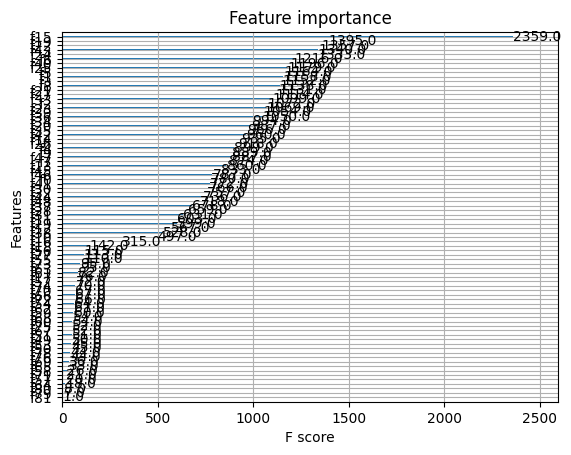

In [ ]:
from xgboost import XGBClassifier

# Fit XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Plot feature importance
from xgboost import plot_importance
plot_importance(model)

In [ ]:
model = tf.keras.models.load_model("test.h5")
input_data = np.array([[
    -1.011373, -1.164452, 0.127054, -0.145245, -0.451766, -0.021983, -0.453841, -0.422493, 0.192945, -0.050550, 0.319941, -0.109665, -0.054009, -0.036396, 0.053002, -0.396086, -0.445063, 0.163204, -0.273748, 0.408257, -1.004061, -0.426657, -0.377308, -2.413074, 0.094527, -0.731097, -3.513846, -0.544887, -1.337044, -1.661795, 1.840644, -1.690777, 0.902468, -2.286834, -1.634705, -1.846164, -0.305944, -2.355913, -1.694579, -2.937205, -0.841239, 0.634202, 0.441781, 0.240971, -0.350408, -0.128886, 0.029036, -0.160107, -0.560655, -0.678016, 0.473774, 0.479629, 0.007908, 0.005259, 0.165135, 0.053129, -0.292463, -0.098335, -2.012302, -1.333345, 0.69819, 0.465221, 2.733094, 0.508849, -0.153746, -0.179534, -0.736261, -1.190875, -0.569574, 3.291722, 1.916642, 1.929697, 2.360313, 2.509828, 2.590022, 0.238735, -0.613749, 1.397003, 0.015208, 2.343146, 0.986745, 1.867661, -0.711345, -0.061491, -0.320011, -0.549334, 0.457357, -0.057124, 2.07893, 1.145024, 0.647386, 1.156987, 1.676575, 1.306359, -0.498473, -0.650639, -0.196015, -0.39366, 1.522386, 0.329277, -0.801376, 0.129470, -0.513347, 0.595799, 0.565805, -1.436913, 0.682750, -0.040849, -0.011148, 0.009450, 0.625390, -0.290635, 0.067678, 0.077686, -0.177054, -0.143814, -0.228558, -0.169295, -0.169295, -0.172435, -0.185987, -0.208184, -0.172435, -0.166102, -0.224853, -0.206856, -0.20552, -0.172435, -0.201471, -0.180074, -0.195961, -0.180074, -0.195961, -0.164485, -0.175526, -0.159545, -0.161206, -0.190317, -0.204178, 5.254398, -0.18744, -0.201471, -0.180074, -0.173987, -1.02774, 1.02774, -0.41833, -0.267696, -0.406558, -0.154463, 1.237243, -0.493818, -0.169295, -0.531649, -0.518303, -0.644247, 1.625443
]], dtype=np.float32)
prediction = model.predict(input_data)
prediction


NameError: name 'np' is not defined

In [ ]:
# !pip install tensorflowjs
# import tensorflow as tf
# import tensorflowjs as tfjs
# from keras.models import load_model
modelk = load_model("test.h5")


tfjs.converters.save_keras_model(
            modelk,
            './h5',
            # quantization_dtype=None,
            # strip_optimizer=True
        )

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("test.h5")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          40,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,113 (328.57 KB)

 Trainable params: 83,343 (325.56 KB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2 (12.00 B)